**Loan Approval Prediction System — End-to-End Machine Learning Project**

This project focuses on building an end-to-end machine learning system that predicts whether a loan application should be approved or rejected based on financial parameters such as annual income and credit score. The model is trained using supervised learning techniques, where the data is preprocessed, scaled, and split into training and testing sets. Logistic Regression is used to classify loan eligibility.

After training, the model and scaler are saved using pickle, and a user-friendly web interface is created using Streamlit. The deployed application allows users to input new financial data and instantly receive prediction results. The entire project is hosted via ngrok, enabling easy access to the live web app.

This system demonstrates the full pipeline of machine learning — from data preprocessing and model training to deployment — making it a practical and real-world ML application.

**INSTALLING PACKAGES**

In [1]:
!pip install -q mlxtend

**IMPORTS**

In [2]:
# Basic libs and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# plotting decision regions
from mlxtend.plotting import plot_decision_regions

# saving model
import pickle


**Load Dataset**

In [3]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

# Quick peek
print("Shape:", df.shape)
df.head()


Shape: (150, 3)


,Income,CreditScore,LoanApproved
0,87417.22,844.96,1
1,191128.58,443.74,1
2,151758.91,386.94,1
3,127758.53,593.67,1
4,48083.36,891.39,0


**Info & basic EDA**

In [4]:
# Data info
df.info()

# Describe numeric stats
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Income        150 non-null    float64
 1   CreditScore   150 non-null    float64
 2   LoanApproved  150 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


,Income,CreditScore,LoanApproved
count,150.000000,150.000000,150.000000
mean,105119.683867,610.513267,0.620000
std,53375.539329,174.847081,0.487013
min,20993.980000,303.040000,0.000000
25%,58660.632500,448.482500,0.000000
50%,100660.025000,633.600000,1.000000
75%,154939.127500,754.700000,1.000000
max,197639.650000,894.030000,1.000000


**Scatter plot (EDA)**

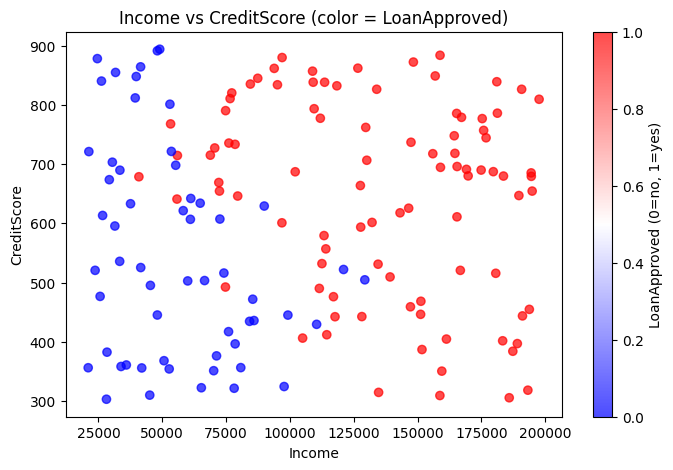

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(df['Income'], df['CreditScore'], c=df['LoanApproved'], cmap='bwr', alpha=0.7)
plt.xlabel('Income')
plt.ylabel('CreditScore')
plt.title('Income vs CreditScore (color = LoanApproved)')
plt.colorbar(label='LoanApproved (0=no, 1=yes)')
plt.show()


**Extract features and target**

In [6]:
# X = first two columns, y = last column
X = df.iloc[:, 0:2]   # Income, CreditScore
y = df.iloc[:, -1]    # LoanApproved

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (150, 2)
y shape: (150,)


**Train / Test split**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

print("X_train:", X_train.shape, "X_test:", X_test.shape)


X_train: (135, 2) X_test: (15, 2)


**Scaling (StandardScaler)**

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# If you want to see scaled values:
X_train_scaled[:5]


array([[-0.67107926, -1.35703102],
       [ 0.51353849,  1.23133649],
       [-1.16018923, -0.6728253 ],
       [ 0.37423362,  1.43613824],
       [-0.58223433, -1.12181374]])

**Train classifier (Logistic Regression as clf)**

In [9]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)

print("Training complete.")


Training complete.


**Predictions & Accuracy**

In [10]:
y_pred = clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy on test set: 0.8000

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.67      0.80         9

    accuracy                           0.80        15
   macro avg       0.83      0.83      0.80        15
weighted avg       0.87      0.80      0.80        15


Confusion Matrix:
[[6 0]
 [3 6]]


**Plot decision regions**

/tmp/ipython-input-2275098282.py:6: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X_plot, y_plot.astype(np.integer), clf=clf, legend=2)   # mlxtend expects int labels


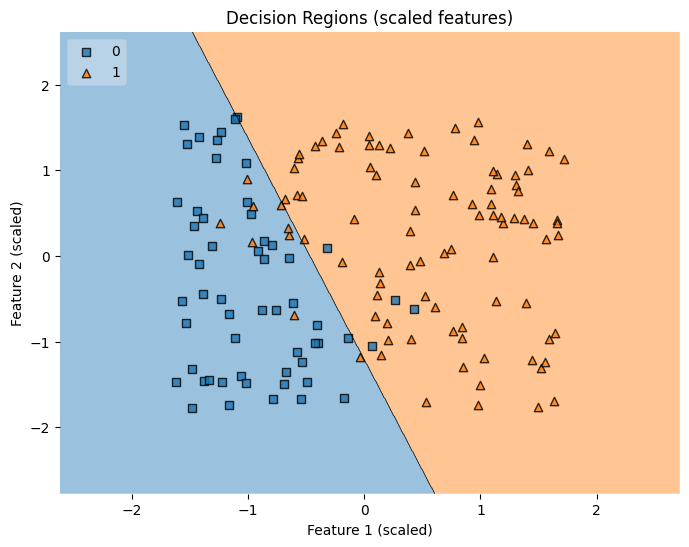

In [11]:
# plot_decision_regions requires numpy arrays and 1D y
X_plot = np.vstack((X_train_scaled, X_test_scaled))
y_plot = np.hstack((y_train.values, y_test.values))

plt.figure(figsize=(8,6))
plot_decision_regions(X_plot, y_plot.astype(np.integer), clf=clf, legend=2)   # mlxtend expects int labels
plt.title('Decision Regions (scaled features)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()


**Save (pickle) the model and scaler**

In [12]:
# Save the classifier and scaler so you can load them later for inference or Streamlit
pickle.dump(clf, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

print("Saved model.pkl and scaler.pkl")


Saved model.pkl and scaler.pkl


In [13]:
# Run this to confirm your saved files are present
import os

print("model.pkl exists:", os.path.exists("/content/model.pkl"))
print("scaler.pkl exists:", os.path.exists("/content/scaler.pkl"))

# list files for visual confirmation
!ls -lah


model.pkl exists: True
scaler.pkl exists: True
total 28K
drwxr-xr-x 1 root root 4.0K Nov 17 08:40 .
drwxr-xr-x 1 root root 4.0K Nov 17 08:27 ..
drwxr-xr-x 4 root root 4.0K Nov 12 14:30 .config
-rw-r--r-- 1 root root 2.8K Nov 17 08:31 loan_approval_dataset.csv
-rw-r--r-- 1 root root  732 Nov 17 08:40 model.pkl
drwxr-xr-x 1 root root 4.0K Nov 12 14:30 sample_data
-rw-r--r-- 1 root root  608 Nov 17 08:40 scaler.pkl


**Install Streamlit & pyngrok**

In [14]:
# Run once in the notebook
!pip install -q streamlit
!pip install -q pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 64.4 MB/s eta 0:00:00


In [17]:
!ngrok config add-authtoken 35b87138lM5BcH2CoSnAatHBtfG_6GoYt4kbZVAViprcHTpkx


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


**Quick test: load model & scaler (sanity check)**

In [18]:
# Load and do a quick prediction with a sample input so you know the pickles work
import pickle
import numpy as np

with open("/content/model.pkl", "rb") as f:
    model = pickle.load(f)

with open("/content/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Example sample (Income, CreditScore) - change if you want
sample = np.array([[60000, 650]])
sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)
print("Sample:", sample, " -> Predicted LoanApproved:", int(pred[0]))


Sample: [[60000   650]]  -> Predicted LoanApproved: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Create the Streamlit app file**

In [19]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

# Load model & scaler
with open('/content/model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('/content/scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

st.set_page_config(page_title="Loan Approval Predictor", layout="centered")
st.title("Loan Approval Prediction App")
st.markdown("Enter applicant details and click **Predict** to see if the loan is likely to be approved.")

income = st.number_input("Enter Annual Income (₹)", min_value=10000, max_value=1000000, value=50000, step=1000)
credit_score = st.number_input("Enter Credit Score", min_value=300, max_value=900, value=600, step=1)

if st.button("Predict"):
    data = np.array([[income, credit_score]])
    scaled_data = scaler.transform(data)
    prediction = model.predict(scaled_data)

    if int(prediction[0]) == 1:
        st.success("✅ Loan Approved")
    else:
        st.error("❌ Loan Rejected")


Overwriting app.py


In [20]:
from pyngrok import ngrok
!pkill streamlit
get_ipython().system_raw('streamlit run app.py &')
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://32335e8b904c.ngrok-free.app" -> "http://localhost:8501">